In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the dataset of Titanic

df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Do the feature engineering by analyzing the missing or null values

# Check the shape of the dataset
df_train.shape

(891, 12)

In [5]:
# Find the null values in the dataset
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Lets find out the percentage null values w.r.t columns
df_train_p=(df_train.isnull().sum()/df_train.shape[0])*100
df_train_p

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

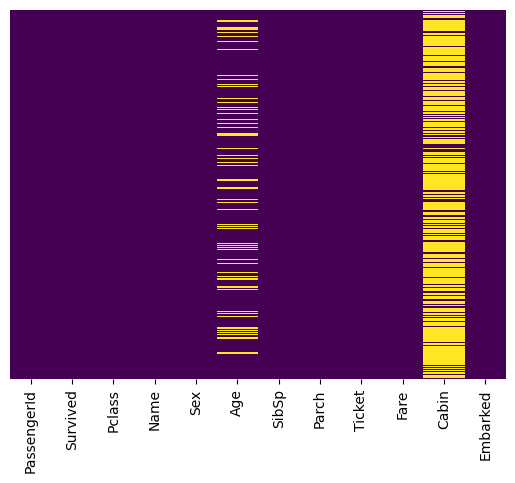

In [7]:
# Lets visualize the null values through heatmap

sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

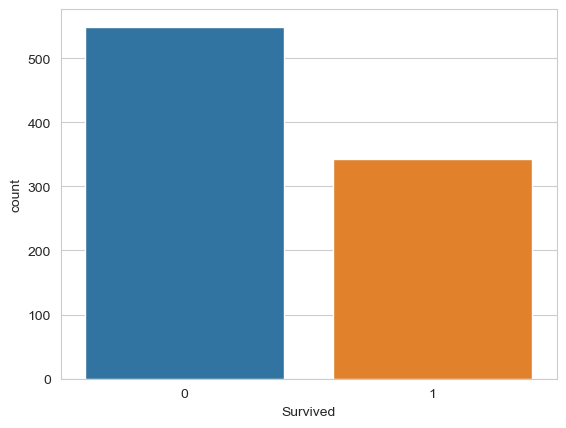

In [8]:
# Lets analyze, how many people survived in the Titanic disaster
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

# We can see more than 550 people died and around 340 people survived in this disaster

<AxesSubplot:xlabel='Survived', ylabel='count'>

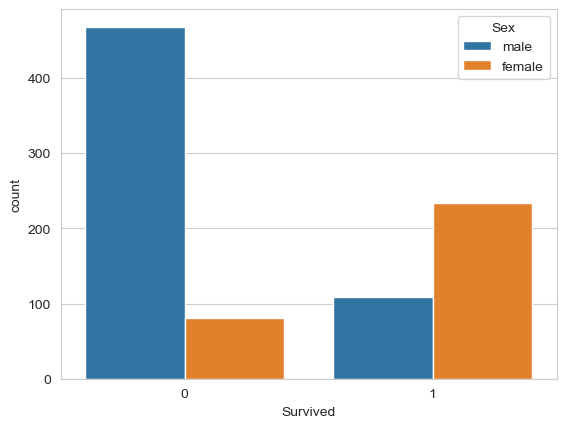

In [9]:
# Lets analyze the survival data w.r.t Sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train)

# We can clearly see that the survival of female is more than male which is around 230 than 110 from male. Similarly, around 470 males died where around some 80 females died

<AxesSubplot:xlabel='Survived', ylabel='count'>

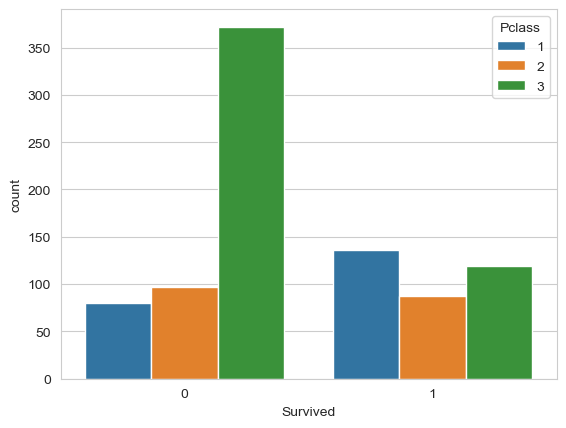

In [10]:
# Lets analyze the survival w.r.t the Pclass (Passenger Class) column
sns.countplot(x='Survived',hue='Pclass',data=df_train)

# We can see that around 80 people died from 1st class where as around 95 people died from 2nd class and more than 370 people died from 3rd class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

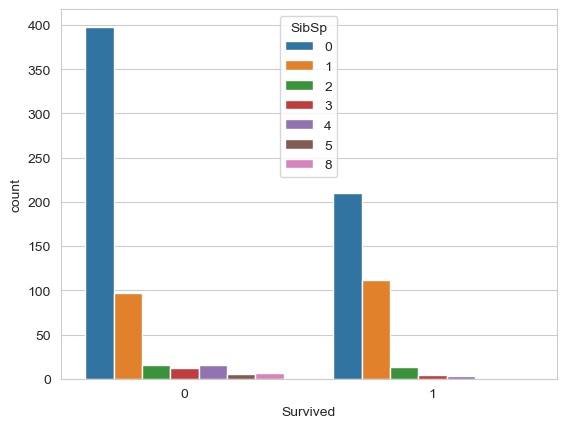

In [11]:
# Lets analyze the Survival w.r.t Siblingspouse and Parentchild column
sns.countplot(x='Survived',hue='SibSp',data=df_train)

# This does not give clear picture as the ratio of Survival and deceased seems similar

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

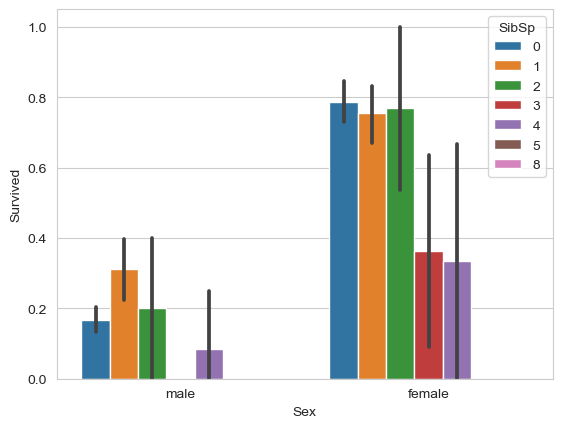

In [12]:
# # Lets analyze survived column with sex along w.r.t SibSp (Sibling Spouse) as hue
sns.barplot(x='Sex',y='Survived',hue='SibSp',data=df_train)

# This reveals the survival of women was preferred by the family heads and the sailors which is around 80%

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

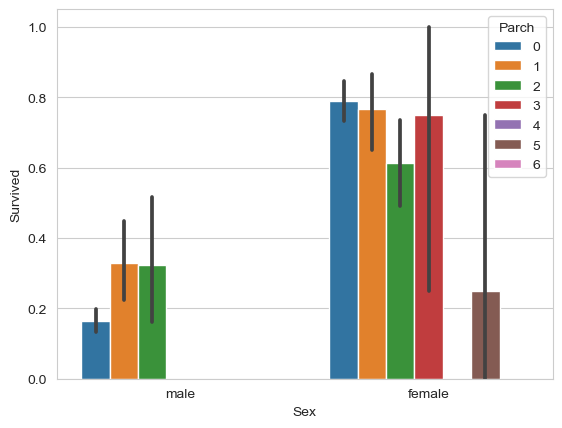

In [13]:
sns.barplot(x='Sex',y='Survived',hue='Parch',data=df_train)

# Similarly, in Parent Child the survival of female was preferrred by the family heads and sailors around 80%. 

# Exploration
The exploration of data reveals that the Sailors preferred survival of Women and children than the Men. Simultaneously, the 1st class passengers were given priority in this disaster which could be due to bribe by the 1st class passengers to sailors.

We need to test our prediction of Survival w.r.t Passenger class

In [14]:
# Lets do the feature engineering of dataset since we have many null values in 'Age' and 'Cabin' column
# Since only 19% of data in 'Age' column has null. We can put the mean value by Passenger class
df_train['Age'].mean()

29.69911764705882

# We can see the mean age of passengers are 30 years

C:\Users\vjkum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

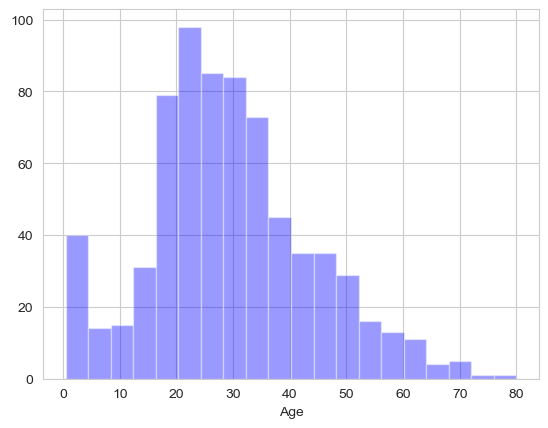

In [15]:
# Lets see the Age of passenger using histogram
sns.distplot(df_train['Age'].dropna(),kde=False,color='blue',bins=20)

# We can see the maximum number of passengers were between Age 18 to 35 years

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

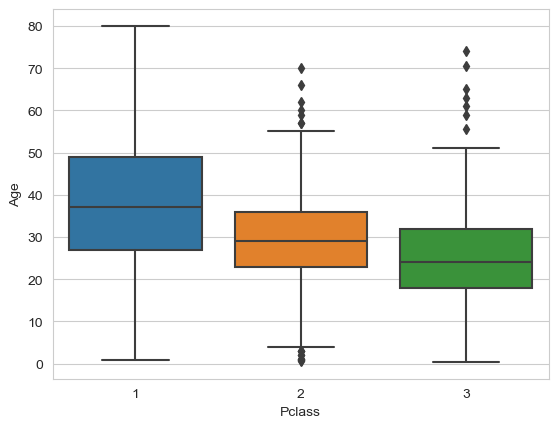

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

# We can clearly see that the mean age of 1st Class passenger is 38, 2nd class is 29 and 3rd class passenger is 24 years

In [17]:
# Lets replace the null values of Age column with the mean values by Passenger class creating a function
def replace_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [18]:
# Now apply the function in Age column w.r.t Pclass
df_train['Age']=df_train[['Age','Pclass']].apply(replace_age,axis=1)

<AxesSubplot:>

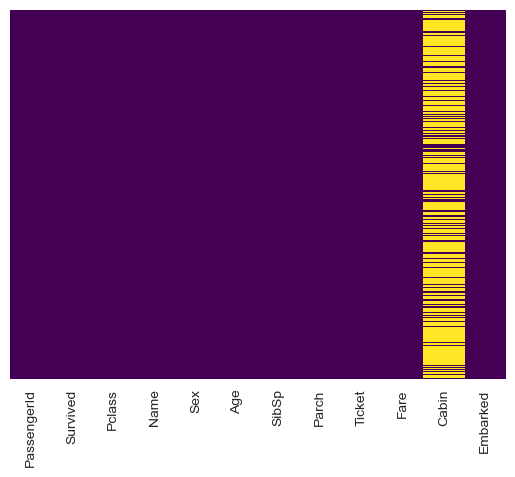

In [19]:
# Lets see the heatmap plot again for null values
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# All null values of 'Age' column has been repalced

In [21]:
# Since the null values in 'Cabin' column is around 77% and there seems no need of the column, we can drop it
df_train.drop('Cabin',axis=1,inplace=True)

In [22]:
# Lets see the dataframe
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Since only 2 null values are present in 'Embarked' column, we can either replace it with the mode or leave it
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [24]:
# The mode of 'Embarked' column is 'S'. Lets replace the null values with 'S'
df_train['Embarked'].fillna('S',inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Selection. There are no null values in the dataset now. Lets do the feature selection

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
# As we can see, Passenger ID, Name and Ticket columns are not required for the model. Similarly, the column Sex and Embarked
# has categorical data which needs to be reaplced with numeric data. Lets change the categorical data using get_dummies
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
Embark=pd.get_dummies(df_train['Embarked'],drop_first=True)

In [28]:
df_train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [29]:
df_train=pd.concat([df_train,sex,Embark],axis=1)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Now our dataset is ready with numerical data. The Survived column is a dependent variable and rest are independent variables.

Lets use LogisticRegression to train and test the dataset and its accuracy

In [30]:
x=df_train.drop(['Survived'],axis=1)
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [31]:
y=df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
# Lets import train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Lets Train and Predict through LogisticRegression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lm=LogisticRegression(max_iter=200)
lm.fit(X_train,y_train)

C:\Users\vjkum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [36]:
predictions=lm.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
accuracy=confusion_matrix(y_test,predictions)

In [39]:
accuracy

array([[138,  19],
       [ 30,  81]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8171641791044776

# This ensures that the prediction of Survival of passengers with respect to their Class plays important role while female passengers and Kids are preferred by the Captain and Sailors along with the family heads. The accuracy of more than 80% affirm the predictions.